# Simple Linear Regression

Simple linear regression is a modeling technique for predicting a numeric response variable based on one explanatory variable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Data Representation

A basic table is a two-dimensional grid of data:
- the rows represent individual observations, 
- the columns represent the variables

A Pandas DataFrame is an ideal representation.

In [2]:
df = pd.read_csv('advertising.csv')
print(df.shape)
df.head()

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

### Feature Matrix

**Features Matrix**: describe the columns containing independent variables to be processed.

By convention, we store the features matrix in a variable named ``X``. The features matrix is two-dimensional, with the shape ``[n_samples, n_features]``.

- The samples (i.e., rows) always refer to the individual objects described by the dataset. 
- The features (i.e., columns) always refer to the variables.

In [4]:
# Features matrix
X = df[['TV', 'Radio', 'Newspaper']]
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [5]:
print('Dimensions of the Feature Matrix: ', X.shape)

Dimensions of the Feature Matrix:  (200, 3)


#### Visualizing the feature matrix

In [6]:
sns.set(rc={"figure.figsize":(8, 5)}) #width=8, height=5

Let's visualize the feature matrix variables using several graphs.

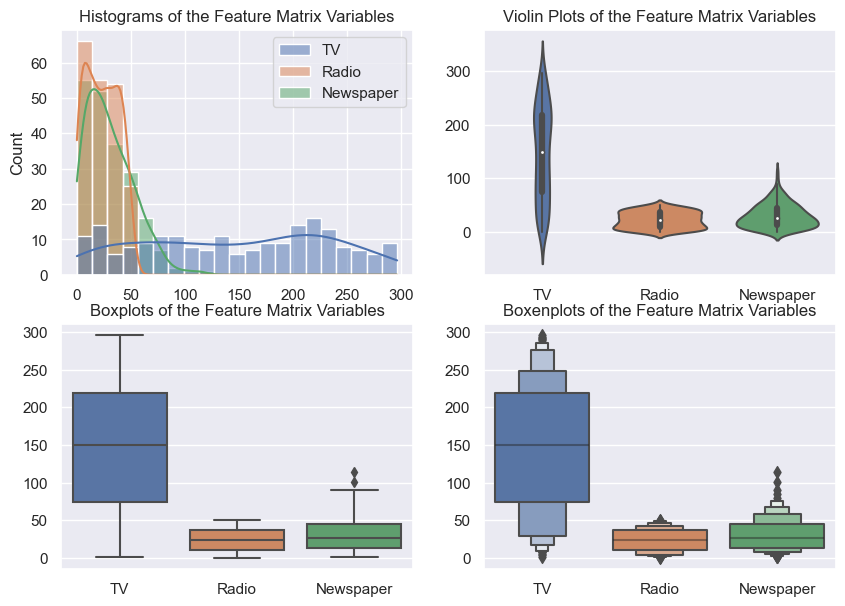

In [7]:
plt.figure(figsize=(10, 7))

plt.subplot(221)
sns.histplot(data = X, kde=True).set(title="Histograms of the Feature Matrix Variables")

plt.subplot(222)
sns.violinplot(data = X).set(title="Violin Plots of the Feature Matrix Variables")

plt.subplot(223)
sns.boxplot(data = X).set(title="Boxplots of the Feature Matrix Variables")

plt.subplot(224)
sns.boxenplot(data = X).set(title="Boxenplots of the Feature Matrix Variables");

### Target array

**Target array**: a label or target array we want to predict. It is by convention called `y`. 

The target array is usually one dimensional, with length `n_samples`. It is generally a one-dimension NumPy array or a Pandas Series. 

For regression problems, the target array has continuous numerical values.

In [8]:
# Target array
y = df[['Sales']]
y.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


In [9]:
print('Dimensions of the Target array: ', y.shape)

Dimensions of the Target array:  (200, 1)


#### Visualizing the target variable

Let's visualize the target variable using several graphs.

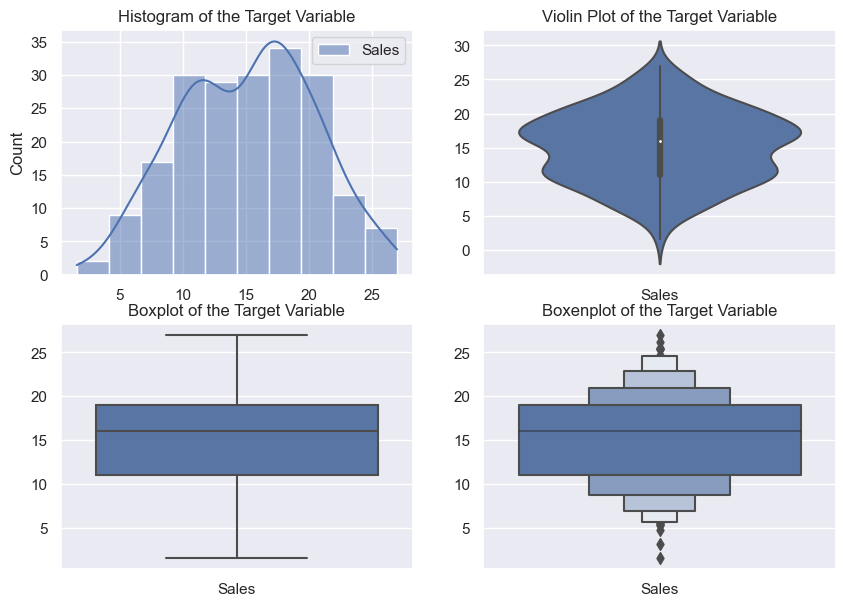

In [10]:
plt.figure(figsize=(10, 7))

plt.subplot(221)
sns.histplot(data = y, kde=True).set(title="Histogram of the Target Variable")

plt.subplot(222)
sns.violinplot(data = y).set(title="Violin Plot of the Target Variable")

plt.subplot(223)
sns.boxplot(data = y).set(title="Boxplot of the Target Variable")

plt.subplot(224)
sns.boxenplot(data = y).set(title="Boxenplot of the Target Variable");

## Basis of Scikit-Learn library

Scikit-Learn is a package that provides efficient versions of multiple standard machine learning algorithms.

It has a uniform API and proper online documentation. Once you understand the essential use and syntax of Scikit-Learn for one type of model, switching to a new model is very easy.

Most commonly, the steps in using the Scikit-Learn estimator API are as follows.

1. Choose a class of model 
2. Choose model hyperparameters 
3. Arrange data into a feature matrix and target array.
4. Fit the model 
5. Apply the model to new data. 

## Simple linear regression

Let's find a simple regression analysis between `TV` (X) and `Sales` (y).

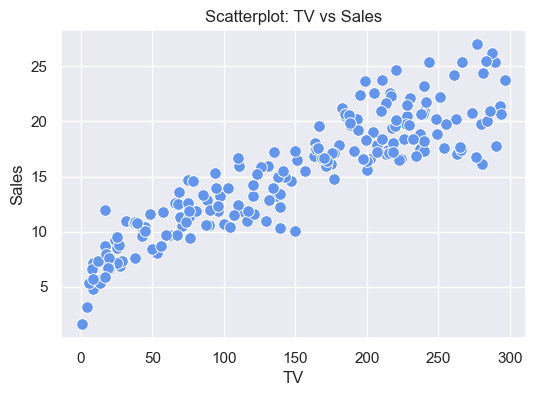

In [11]:
# Scatterplot
sns.set(rc={"figure.figsize":(6, 4)}) # width=6, height=4
sns.scatterplot(x=df.TV, y=df.Sales, 
                s=70, color='cornflowerblue').set_title("Scatterplot: TV vs Sales");

**1. Choose a class model**

To compute a simple linear regression model, we must import the linear regression class.

In [12]:
from sklearn.linear_model import LinearRegression

**2. Choose model hyperparameters**

Depending on the model class we are working with, we might need to answer one or more questions like the following:
* Would we like to include the y-intercept in the model?
* Would we need to preprocess the feature matrix variables to add model flexibility?
* What degree of regularization would we want to use in our model?

These are examples of the critical choices we must make once the model class is selected. These choices are the hyperparameters, or parameters we must set before fitting the model. 

For our simple linear regression example, we can instantiate the LinearRegression class and specify that we want to fit the intercept using the `fit_intercept` hyperparameter.

In [13]:
model = LinearRegression(fit_intercept=True)

**3. Arrange data into a features matrix and target array**

This is a simple example where the Feature Matrix is composed only by one variable `df.TV`. The target array is `df.Sales`

In [14]:
# Feature Matrix (only one variable)
X = df.TV.values.reshape(-1,1).astype('float32')
print('Features Matrix Dim:', X.shape) 

Features Matrix Dim: (200, 1)


In [15]:
# Target variable
y = df.Sales.values.reshape(-1,1).astype('float32') 
#y = df.Sales.values.astype('float32') 

We can better understand a model's expected performance on unseen data by setting a portion of our training data aside when creating a model and then using that set-aside data to evaluate its performance.

Holdout validation involves:
1. Split the training data into two parts, a training set and a validation set 
2. Build a model with the training set 
3. Assess performance with the validation set

We can split the data using the `train_test_split` utility in `Scikit-Learn`.

In [16]:
from sklearn.model_selection import train_test_split    # for Holdout Validation

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=20) 
print('Train Set: %i cases, \tTest Set: %i cases' %(X_train.shape[0], X_test.shape[0])) 

Train Set: 140 cases, 	Test Set: 60 cases


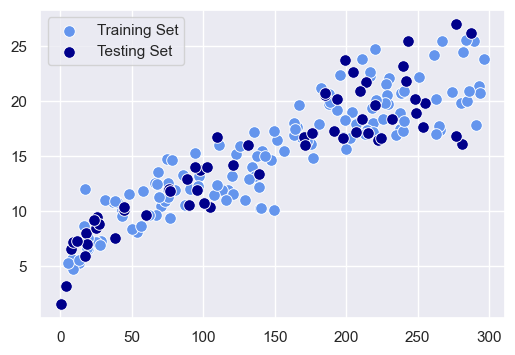

In [18]:
# Graphing the training and test sets
sns.scatterplot(x=X_train.flatten(), y=y_train.flatten(), s=70, color='cornflowerblue', label='Training Set')
sns.scatterplot(x=X_test.flatten(),  y=y_test.flatten(),  s=70, color='darkblue',       label='Testing Set');  

**4. Fit the model**

This can be done with the `fit()` method of the model. We will use the train set.

In [19]:
model.fit(X_train, y_train)

LinearRegression()

This `fit()` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore. 

In Scikit-Learn, by convention all model parameters that were learned during the `fit()` process have trailing underscores; for example:

In [20]:
model.coef_

array([[0.05396698]], dtype=float32)

In [21]:
model.intercept_

array([7.1646748], dtype=float32)

In [22]:
print('Linear Model: y = %.2f x + %.2f' %(model.coef_, model.intercept_))

Linear Model: y = 0.05 x + 7.16


$R^2$ (coefficient of determination) describes the proportion of variance in the response variable that is explained by the model.

In [23]:
print('R2=%.3f ' %(model.score(X = X_train, y = y_train)))

R2=0.810 


Showing the value as a percent

In [24]:
print('Training Set R2=%.1f%%' %(model.score(X = X_train, y = y_train)*100))

Training Set R2=81.0%


Scikit-Learn is a simple package that does not provide tools to draw conclusions from internal model parameters themselves. You will learn to use more advanced packages like ``Statsmodels`` to complete the analysis.

**5. Apply the Model to new data**

Let's use the model with the `X_test` and get the predicted `y_fit`. Remember the model has never seen the values `X_test`.

In [25]:
y_pred = model.predict(X_test)

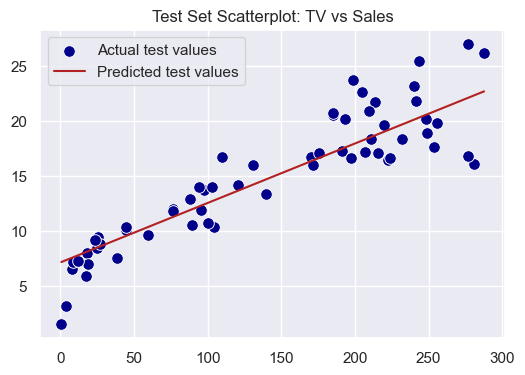

In [26]:
# Plotting the results
sns.scatterplot(x=X_test.flatten(), y=y_test.flatten(), s=70,  color='darkblue', label='Actual test values');
sns.lineplot(x=X_test.flatten(), y=y_pred.flatten(), color='firebrick', label='Predicted test values'
                ).set_title("Test Set Scatterplot: TV vs Sales"); 

### Performance metrics

Let's use some evaluation metrics with the predicted values.

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
# Computing R2
print('Testing Set: R2=%.3f' %(r2_score(y_test, y_pred)))

Testing Set: R2=0.814


In [29]:
# Showing R2 as a percent
print('Testing Set: R2=%.1f%%' %(r2_score(y_test, y_pred)*100))

Testing Set: R2=81.4%


To quantify how well the model performed, you can use the `Root mean squared error (RMSE)` metric. It is the square root of the average of the squared error (residuals).

`RMSE` is the standard deviation of the residuals (prediction errors). RMSE measures how dispersed these residuals are; in other words, it tells you how concentrated the data is around the line of best fit.

The lower the `RMSE`, the better a model fits a dataset.

In [30]:
# Computing the RMSE
print('Testing Set: RMSE=%.2f' %(mean_squared_error(y_test, y_pred, squared=False)))

Testing Set: RMSE=2.51


## Introduction to statsmodels library

Statsmodels is a Python library that provides functions for: 
- estimating many statistical models, 
- conducting statistical tests, 
- and making multiple statistical data explorations.

In [31]:
import statsmodels.api as sm

In [32]:
X_train_c = sm.add_constant(X_train)
sm_regression_model = sm.OLS(y_train, X_train_c).fit()
y_pred_sm = sm_regression_model.predict(X_train_c) 

In [33]:
sm_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     587.8
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           1.35e-51
Time:                        19:14:32   Log-Likelihood:                -308.29
No. Observations:                 140   AIC:                             620.6
Df Residuals:                     138   BIC:                             626.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1647      0.381     18.789      0.000       6.411       7.919
x1             0.0540      0.002     24.245      0.000       0.050       0.058
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.976
Skew:                           0.109   Prob(JB):                        0.614
Kurtosis:                       2.654   Cond. No.                         351.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Residuals are prediction errors. They measure how far the data points from the regression line are.

The residuals will be normally distributed in a well-behaved linear regression model. We want a roughly even error spread above and below the regression line. 

### Q-Q Plot

We can investigate the normality of residuals with a Q-Q (quantile-quantile) plot. 

In [34]:
from statsmodels.graphics.gofplots import qqplot

In [35]:
# Computing the residuals of the first model
residuals = y_test.flatten() - y_pred.flatten()

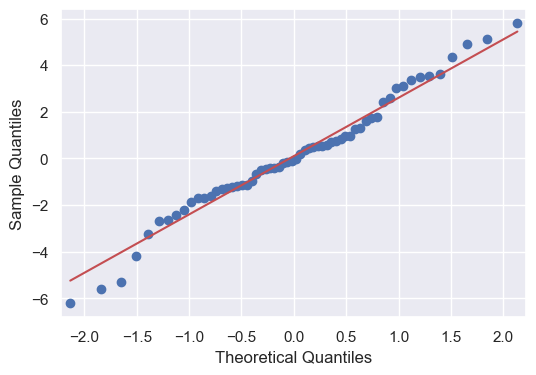

In [36]:
qqplot(residuals, line='s');

When residuals are normally distributed, they tend to lie along the straight line on the Q-Q plot. 

In this case residuals appear to follow a slightly non-linear pattern. This is an indication that simple straight line might not be sufficient to fully describe the relationship between `TV` and `Sales`.

## References

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- VanderPlas, J. (2017) Python Data Science Handbook: Essential Tools for Working with Data. USA: O’Reilly Media, Inc, chapter 5